In [1]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
train_df.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train_df.info()
print('-' * 40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', 
ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', 
ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by = 'Survived', 
ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [11]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by = 'Survived', 
ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [12]:
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

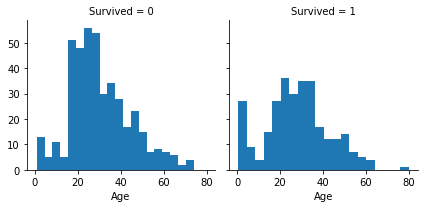

In [13]:
g = sns.FacetGrid(train_df, col = 'Survived')
g.map(plt.hist, 'Age', bins = 20)

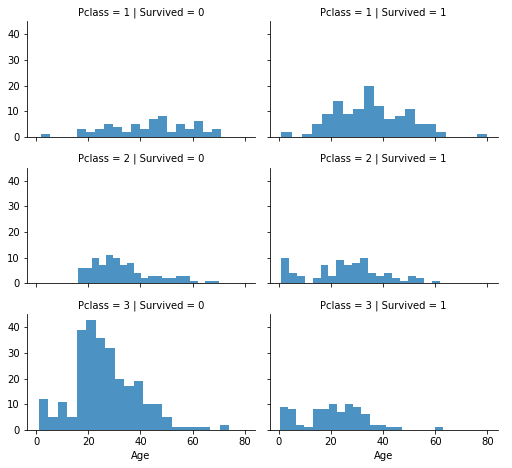

In [14]:
grid = sns.FacetGrid(train_df, col = 'Survived', row = 'Pclass', height = 2.2, aspect = 1.6)
grid.map(plt.hist, 'Age', alpha = 0.8, bins = 20)
grid.add_legend()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


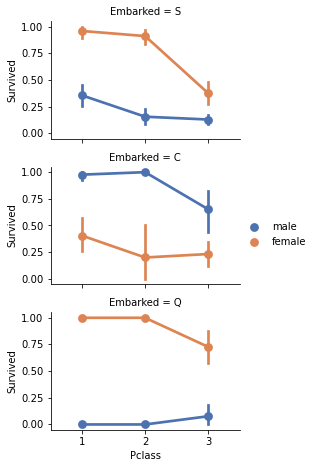

In [15]:
grid = sns.FacetGrid(train_df, row = 'Embarked', height = 2.2, aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


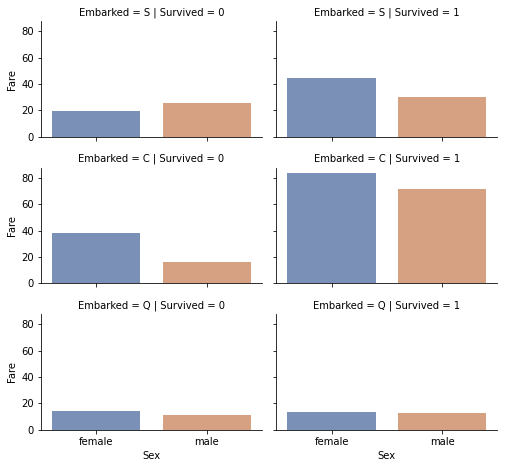

In [16]:
grid = sns.FacetGrid(train_df, row = 'Embarked', col = 'Survived', height = 2.2, aspect = 1.6)
grid.map(sns.barplot, 'Sex', 'Fare', palette = 'deep', alpha=.8, ci=None)
grid.add_legend()

In [17]:
print('Before', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis = 1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis = 1)
combine = [train_df, test_df]

print('After', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


In [18]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand = False)
combine[0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,Mr


In [19]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [20]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkeer', 'Lady', 
                                                 'Major', 'Rev', 'Sir'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [21]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index = False).mean()

,Title,Survived
0,Jonkheer,0.000000
1,Master,0.575000
2,Miss,0.702703
3,Mr,0.156673
4,Mrs,0.793651
5,Rare,0.363636


In [22]:
title_map = {'Miss': 1, 'Mrs': 2, 'Master': 3, 'Mr': 4, 'Rare': 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_map)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,4.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,4.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q,4.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,4.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,3.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,2.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,2.0


In [23]:
train_df = train_df.drop(['Name', 'PassengerId'], axis = 1)
test_df = test_df.drop(['Name'], axis = 1)

combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [24]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,4.0
1,1,1,female,38.0,1,0,71.2833,C,2.0
2,1,3,female,26.0,0,0,7.9250,S,1.0
3,1,1,female,35.0,1,0,53.1000,S,2.0
4,0,3,male,35.0,0,0,8.0500,S,4.0


In [25]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female': 0, 'male': 1}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,S,4.0
1,1,1,0,38.0,1,0,71.2833,C,2.0
2,1,3,0,26.0,0,0,7.9250,S,1.0
3,1,1,0,35.0,1,0,53.1000,S,2.0
4,0,3,1,35.0,0,0,8.0500,S,4.0


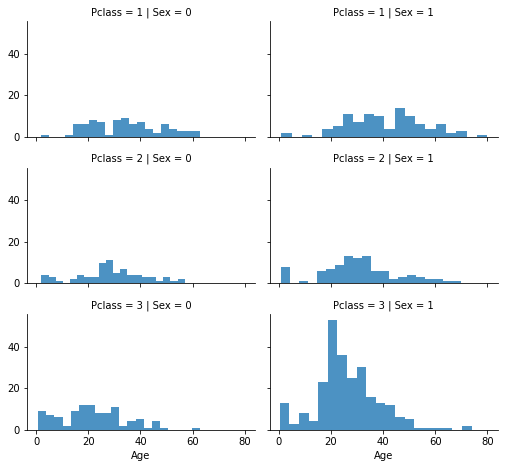

In [26]:
grid = sns.FacetGrid(train_df, row = 'Pclass', col = 'Sex', height = 2.2, aspect = 1.6)
grid.map(plt.hist, 'Age', alpha = 0.8, bins = 20)
grid.add_legend()

In [27]:
guessed_ages = np.zeros((2, 3))
guessed_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [28]:
for dataset in combine:
    for i in range(2):
        for j in range(3):
            
            guessed_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j + 1)]['Age'].dropna()
            
            guessed_age = guessed_df.median()
            
            #convert to nearest 0.5 age
            guessed_ages[i, j] = int(guessed_age / 0.5 + 0.5) * 0.5
            
    for i in range(2):
        for j in range(3):
            dataset.loc[(dataset.Sex == i) & (dataset.Pclass == j + 1) & (dataset.Age.isnull()), 'Age'] = guessed_ages[i, j]
                
    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22,1,0,7.2500,S,4.0
1,1,1,0,38,1,0,71.2833,C,2.0
2,1,3,0,26,0,0,7.9250,S,1.0
3,1,1,0,35,1,0,53.1000,S,2.0
4,0,3,1,35,0,0,8.0500,S,4.0


In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     891 non-null    float64
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


In [30]:
train_df['Age_band'] = pd.cut(train_df['Age'], 5)
train_df[['Age_band', 'Survived']].groupby(['Age_band'], as_index = False).mean().sort_values(by = 'Age_band')

,Age_band,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [31]:
for dataset in combine:
    dataset.loc[dataset.Age <= 16, 'Age'] = 0
    dataset.loc[(dataset.Age > 16) & (dataset.Age <= 32), 'Age'] = 1
    dataset.loc[(dataset.Age > 32) & (dataset.Age <= 48), 'Age'] = 2
    dataset.loc[(dataset.Age > 48) & (dataset.Age <= 64), 'Age'] = 3
    dataset.loc[dataset.Age > 64, 'Age'] = 4

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_band
0,0,3,1,1,1,0,7.2500,S,4.0,"(16.0, 32.0]"
1,1,1,0,2,1,0,71.2833,C,2.0,"(32.0, 48.0]"
2,1,3,0,1,0,0,7.9250,S,1.0,"(16.0, 32.0]"
3,1,1,0,2,1,0,53.1000,S,2.0,"(32.0, 48.0]"
4,0,3,1,2,0,0,8.0500,S,4.0,"(32.0, 48.0]"


In [32]:
train_df = train_df.drop('Age_band', axis = 1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,1,1,0,7.2500,S,4.0
1,1,1,0,2,1,0,71.2833,C,2.0
2,1,3,0,1,0,0,7.9250,S,1.0
3,1,1,0,2,1,0,53.1000,S,2.0
4,0,3,1,2,0,0,8.0500,S,4.0


In [33]:
for dataset in combine:
    dataset['Family_size'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['Family_size', 'Survived']].groupby(['Family_size'], as_index = False).mean().sort_values(by = 'Family_size')

,Family_size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [34]:
for dataset in combine:
    dataset['isAlone'] = 0
    dataset.loc[dataset['Family_size'] == 1, 'isAlone'] = 1
    
train_df[['isAlone', 'Survived']].groupby(['isAlone'], as_index = False).mean().sort_values(by = 'isAlone')

,isAlone,Survived
0,0,0.505650
1,1,0.303538


In [35]:
train_df = train_df.drop(['SibSp', 'Parch', 'Family_size'], axis = 1)
test_df = test_df.drop(['SibSp', 'Parch', 'Family_size'], axis = 1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone
0,0,3,1,1,7.2500,S,4.0,0
1,1,1,0,2,71.2833,C,2.0,0
2,1,3,0,1,7.9250,S,1.0,1
3,1,1,0,2,53.1000,S,2.0,0
4,0,3,1,2,8.0500,S,4.0,1


In [36]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [37]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Embarked')

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [38]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'Q': 1, 'C': 2}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone
0,0,3,1,1,7.2500,0,4.0,0
1,1,1,0,2,71.2833,2,2.0,0
2,1,3,0,1,7.9250,0,1.0,1
3,1,1,0,2,53.1000,0,2.0,0
4,0,3,1,2,8.0500,0,4.0,1


In [39]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    int64  
 4   Fare         417 non-null    float64
 5   Embarked     418 non-null    int64  
 6   Title        418 non-null    float64
 7   isAlone      418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [40]:
test_df.fillna(test_df['Fare'].dropna().median(), inplace = True)

In [41]:
train_df['Fare_band'] = pd.qcut(train_df['Fare'], 4)
train_df[['Fare_band', 'Survived']].groupby(['Fare_band'], as_index = False).mean().sort_values(by = 'Fare_band')

,Fare_band,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [42]:
for dataset in combine:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] <= 14.454) & (dataset['Fare'] > 7.91), 'Fare'] = 0
    dataset.loc[(dataset['Fare'] <= 31.0) & (dataset['Fare'] > 14.454), 'Fare'] = 0
    dataset.loc[(dataset['Fare'] <= 512.329) & (dataset['Fare'] > 31.0) , 'Fare'] = 0
    
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,Fare_band
0,0,3,1,1,0,0,4.0,0,"(-0.001, 7.91]"
1,1,1,0,2,0,2,2.0,0,"(31.0, 512.329]"
2,1,3,0,1,0,0,1.0,1,"(7.91, 14.454]"
3,1,1,0,2,0,0,2.0,0,"(31.0, 512.329]"
4,0,3,1,2,0,0,4.0,1,"(7.91, 14.454]"


In [43]:
train_df = train_df.drop(['Fare_band'], axis = 1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone
0,0,3,1,1,0,0,4.0,0
1,1,1,0,2,0,2,2.0,0
2,1,3,0,1,0,0,1.0,1
3,1,1,0,2,0,0,2.0,0
4,0,3,1,2,0,0,4.0,1


In [44]:
test_df

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,isAlone
0,892,3,1,2,0,1,4.0,1
1,893,3,0,2,0,0,2.0,0
2,894,2,1,3,0,1,4.0,1
3,895,3,1,1,0,0,4.0,1
4,896,3,0,1,0,0,2.0,0
...,...,...,...,...,...,...,...,...
413,1305,3,1,1,0,0,4.0,1
414,1306,1,0,2,0,2,0.0,1
415,1307,3,1,2,0,0,4.0,1
416,1308,3,1,1,0,0,4.0,1


In [45]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [46]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
Y_pred = log_reg.predict(X_test)
accuracy_log = round(log_reg.score(X_train, Y_train) * 100, 2)
accuracy_log

79.57

In [47]:
coff_df = pd.DataFrame(train_df.columns.delete(0))
coff_df.columns = ['Feature']
coff_df['Correlation'] = pd.Series(log_reg.coef_[0])

coff_df.sort_values(by = 'Correlation', ascending = False)

,Feature,Correlation
4,Embarked,0.243533
6,isAlone,0.035825
3,Fare,0.021236
5,Title,-0.286472
2,Age,-0.488096
0,Pclass,-1.169816
1,Sex,-1.833914


In [48]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
accuracy_svc = round(svc.score(X_train, Y_train) * 100, 2)
accuracy_svc

78.45

In [49]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
accuracy_knn = round(knn.score(X_train, Y_train) * 100, 2)
accuracy_knn

82.94

In [50]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

61.95

In [51]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

74.07

In [52]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


79.57

In [53]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

73.63

In [54]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

84.29

In [55]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
#random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

84.29

In [56]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [accuracy_svc, accuracy_knn, accuracy_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})

models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,84.29
8,Decision Tree,84.29
1,KNN,82.94
2,Logistic Regression,79.57
7,Linear SVC,79.57
0,Support Vector Machines,78.45
5,Perceptron,74.07
6,Stochastic Gradient Decent,73.63
4,Naive Bayes,61.95


In [58]:
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred
})

In [59]:
submission.to_csv('titanic_sub')